In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
data

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490
...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275


In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490
...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275


In [ ]:
df['catalog_content']=df['catalog_content'].str.lower()
df['catalog_content']

,catalog_content
0,"item name: la victoria green taco sauce mild, ..."
1,"item name: salerno cookies, the original butte..."
2,"item name: bear creek hearty soup bowl, creamy..."
3,item name: judee’s blue cheese powder 11.25 oz...
4,"item name: kedem sherry cooking wine, 12.7 oun..."
...,...
74995,item name: ice breakers spearmint sugar free m...
74996,"item name: davidson's organics, vanilla essenc..."
74997,item name: jolly rancher hard candy - blue ras...
74998,item name: nescafe dolce gusto capsules - cara...


In [ ]:
import re
from tqdm import tqdm
tqdm.pandas()

In [ ]:
def seperate(text):
    item_match = re.search(r'item name:\s*(.*)', text)
    item = item_match.group(1) if item_match else None

    chudap = re.findall(r'bullet point \d+:\s*(.*)', text)
    kyanaamdoo = "\n".join(chudap)
    desc_match = re.search(r'product description:\s*(.*)', text)
    randipana = desc_match.group(1) if desc_match else None

    value_match = re.search(r'value:\s*([0-9.]+)', text)
    value = float(value_match.group(1)) if value_match else None

    unit_match = re.search(r'unit:\s*(.*)', text)
    unit = unit_match.group(1) if unit_match else None

    return pd.Series([item, kyanaamdoo, randipana, value, unit],
                     index=['item', 'marketting', 'description', 'value', 'unit'])

In [ ]:
new_columns_df = df['catalog_content'].progress_apply(seperate)
df = pd.concat([df, new_columns_df], axis=1)

100%|██████████| 75000/75000 [00:12<00:00, 5899.48it/s] 


In [ ]:
df.head()

,sample_id,catalog_content,image_link,price,item,marketting,description,value,unit
0,33127,"item name: la victoria green taco sauce mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,"la victoria green taco sauce mild, 12 ounce (p...",,None,72.00,fl oz
1,198967,"item name: salerno cookies, the original butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,"salerno cookies, the original butter cookies, ...",original butter cookies: classic butter cookie...,None,32.00,ounce
2,261251,"item name: bear creek hearty soup bowl, creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,"bear creek hearty soup bowl, creamy chicken wi...",loaded with hearty long grain wild rice and ve...,None,11.40,ounce
3,55858,item name: judee’s blue cheese powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,judee’s blue cheese powder 11.25 oz - gluten-f...,"add to your favorite appetizers, dips & spread...",judees powdered blue cheese cheddar cheese pow...,11.25,ounce
4,292686,"item name: kedem sherry cooking wine, 12.7 oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,"kedem sherry cooking wine, 12.7 ounce - 12 per...",,None,12.00,count


In [ ]:
dt=df.drop('catalog_content',axis=1)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sample_id    75000 non-null  int64  
 1   image_link   75000 non-null  object 
 2   price        75000 non-null  float64
 3   item         74993 non-null  object 
 4   marketting   75000 non-null  object 
 5   description  32533 non-null  object 
 6   value        74060 non-null  float64
 7   unit         75000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.6+ MB


In [ ]:
dt.isnull().sum()

,0
sample_id,0
image_link,0
price,0
item,7
marketting,0
description,42467
value,940
unit,0


In [ ]:
dt['description'] = dt.progress_apply(
    lambda row: row['item'] if row['description'] == None else row['description'],
    axis=1
)

100%|██████████| 75000/75000 [00:00<00:00, 141929.62it/s]


In [ ]:
dt.isnull().sum()

,0
sample_id,0
image_link,0
price,0
item,7
marketting,0
description,4
value,940
unit,0


In [ ]:
dt['item'] = dt.progress_apply(
    lambda row: row['description'] if row['item'] == None else row['item'],
    axis=1
)

100%|██████████| 75000/75000 [00:00<00:00, 140554.89it/s]


In [ ]:
dt.isnull().sum()

,0
sample_id,0
image_link,0
price,0
item,4
marketting,0
description,4
value,940
unit,0


In [ ]:
dt = dt.dropna(subset=['item', 'description'])
dt.isnull().sum()

,0
sample_id,0
image_link,0
price,0
item,0
marketting,0
description,0
value,940
unit,0


In [ ]:
dt['value'] = dt['value'].fillna(dt['value'].median())
dt.isnull().sum()

,0
sample_id,0
image_link,0
price,0
item,0
marketting,0
description,0
value,0
unit,0


In [ ]:
dt['price'].skew()

np.float64(13.60129521827097)

In [ ]:
# sns.histplot(dt['price'], kde=True, bins=50)
# plt.title("Price Distribution")
# plt.xlabel("Price")
# plt.ylabel("Frequency")
# plt.show()

In [ ]:
dt['price_log'] = np.log1p(dt['price'])

In [ ]:
dt['value'].skew()

np.float64(96.21322637072201)

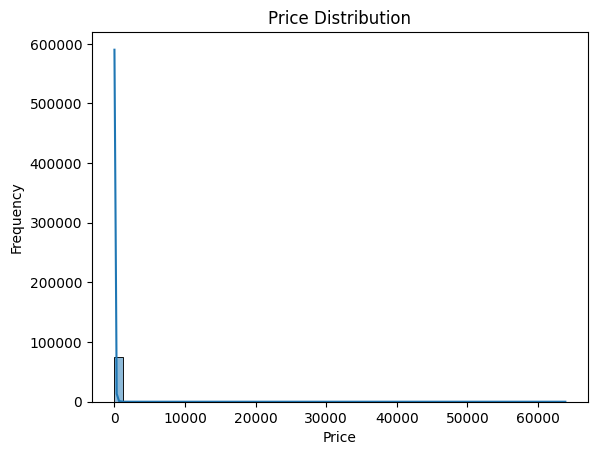

In [ ]:
sns.histplot(dt['value'], kde=True, bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
dt['value'].skew()

np.float64(96.21322637072201)

In [ ]:
dt['value_log'] = np.log1p(dt['value'])

In [ ]:
dt['value_log'].skew()

np.float64(0.19639426978825694)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74996 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sample_id    74996 non-null  int64  
 1   image_link   74996 non-null  object 
 2   price        74996 non-null  float64
 3   item         74996 non-null  object 
 4   marketting   74996 non-null  object 
 5   description  74996 non-null  object 
 6   value        74996 non-null  float64
 7   unit         74996 non-null  object 
 8   price_log    74996 non-null  float64
 9   value_log    74996 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 6.3+ MB


In [ ]:
dt=dt.drop(['value','price'],axis=1)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74996 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sample_id    74996 non-null  int64  
 1   image_link   74996 non-null  object 
 2   item         74996 non-null  object 
 3   marketting   74996 non-null  object 
 4   description  74996 non-null  object 
 5   unit         74996 non-null  object 
 6   price_log    74996 non-null  float64
 7   value_log    74996 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 5.1+ MB


In [ ]:
dt['text'] = dt['item'] + " " + dt['description'] + " " + dt['marketting']+" "+dt['unit']

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74996 entries, 0 to 74999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sample_id    74996 non-null  int64  
 1   image_link   74996 non-null  object 
 2   item         74996 non-null  object 
 3   marketting   74996 non-null  object 
 4   description  74996 non-null  object 
 5   unit         74996 non-null  object 
 6   price_log    74996 non-null  float64
 7   value_log    74996 non-null  float64
 8   text         74996 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ MB


In [ ]:
dt['text'][10665]

"mount hagen 25 count single serve instant decaf coffee packets - 8 pack | decaffeinated organic medium roast arabica beans | eco-friendly, fair-trade [8 x 25 sticks/1.76oz/50g], pack of 8 mount hagen 25 count single serve instant decaf coffee packets - 8 pack | decaffeinated organic medium roast arabica beans | eco-friendly, fair-trade [8 x 25 sticks/1.76oz/50g], pack of 8 instant decaf coffee that doesn’t taste like it: when you need that coffee-flavored boost, mount hagen instant coffee singles are the answer. our advanced freeze-drying and decaffeinating process retains the deep coffee flavors and aromas of the fresh arabica beans, resulting in a wonderfully smooth decaffeinated coffee with a rich, full-bodied taste- even if you’re miles from the nearest coffee store! plus, our instant coffee dissolves beautifully in cold water or milk for instant iced coffee.\nconvenient single-serve sticks: our pocket coffee packets mean you can take good coffee wherever you go. pop our instant d

In [ ]:
def preprocess(text):
    text = str(text)
    if text == "nan":
        return ""
    text = text.lower()
    text = re.sub(r"\n", " ", text)              # replace newlines with space
    text = re.sub(r"[^a-z0-9%\s]", " ", text)    # keep letters, numbers, %, spaces
    text = re.sub(r"\s+", " ", text)             # remove extra spaces
    return text.strip()

In [ ]:
dt['text']=dt['text'].progress_apply(preprocess)

100%|██████████| 74996/74996 [00:05<00:00, 14107.00it/s]


In [ ]:
dt['text'][10665]

'mount hagen 25 count single serve instant decaf coffee packets 8 pack decaffeinated organic medium roast arabica beans eco friendly fair trade 8 x 25 sticks 1 76oz 50g pack of 8 mount hagen 25 count single serve instant decaf coffee packets 8 pack decaffeinated organic medium roast arabica beans eco friendly fair trade 8 x 25 sticks 1 76oz 50g pack of 8 instant decaf coffee that doesn t taste like it when you need that coffee flavored boost mount hagen instant coffee singles are the answer our advanced freeze drying and decaffeinating process retains the deep coffee flavors and aromas of the fresh arabica beans resulting in a wonderfully smooth decaffeinated coffee with a rich full bodied taste even if you re miles from the nearest coffee store plus our instant coffee dissolves beautifully in cold water or milk for instant iced coffee convenient single serve sticks our pocket coffee packets mean you can take good coffee wherever you go pop our instant decaf coffee packets into your ba

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1,2))
text = vectorizer.fit_transform(dt['text'])

# text = vectorizer.transform(dt['text'])

In [ ]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Vectorizer saved successfully as 'tfidf_vectorizer.pkl'")

Vectorizer saved successfully as 'tfidf_vectorizer.pkl'


In [ ]:
print(f"Actual features used: {len(vectorizer.get_feature_names_out())}")


Actual features used: 7000


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74996 entries, 0 to 74999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sample_id    74996 non-null  int64   
 1   image_link   74996 non-null  object  
 2   item         74996 non-null  object  
 3   marketting   74996 non-null  object  
 4   description  74996 non-null  object  
 5   unit         74996 non-null  category
 6   price_log    74996 non-null  float64 
 7   value_log    74996 non-null  float64 
 8   text         74996 non-null  object  
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 7.2+ MB


In [ ]:
text.shape

(74996, 7000)

In [ ]:
from scipy.sparse import hstack

X_train = hstack([text, dt[['value_log']].values])

In [ ]:
X_train.shape

(74996, 7001)

In [ ]:
# train_image_vectors = np.load('/content/drive/MyDrive/test_efficientnet_vectors.npy')
# train_image_vectors.shape

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras as k
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,Activation,GlobalAveragePooling2D,Dropout,Dense,MaxPooling2D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications.efficientnet import EfficientNetB3, preprocess_input, decode_predictions

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model



base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False

TRAIN_CSV_PATH = '/content/drive/MyDrive/train.csv'
IMAGE_FOLDER_ON_DRIVE = '/content/drive/MyDrive/amazon_ml_images/training'

x = base_model.output
pooling_layer = GlobalAveragePooling2D()(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=pooling_layer)
print("EfficientNetB0 feature extractor model built successfully.")
model.summary()

# --- 3. Load your data and create the full image paths ---
df = pd.read_csv(TRAIN_CSV_PATH)
image_paths = df['sample_id'].apply(lambda x: os.path.join(IMAGE_FOLDER_ON_DRIVE, f"{x}.jpg")).tolist()
print(f"Found {len(image_paths)} image paths to process.")

# --- 4. Function to process images in batches ---
def create_image_embeddings(paths, batch_size=64):
    all_vectors = []

    for i in tqdm(range(0, len(paths), batch_size), desc="Processing Batches"):
        batch_paths = paths[i:i + batch_size]
        batch_images_arrays = []

        for img_path in batch_paths:
            if not os.path.exists(img_path):
                # EfficientNetB0 outputs 1280 features
                batch_images_arrays.append(np.zeros((300, 300, 3)))
                continue

            try:
                img = image.load_img(img_path, target_size=(300, 300))
                img_array = image.img_to_array(img)
                batch_images_arrays.append(img_array)
            except Exception as e:
                batch_images_arrays.append(np.zeros((300, 300, 3)))

        # Preprocess the entire batch at once
        batch_to_predict = tf.keras.applications.efficientnet.preprocess_input(np.array(batch_images_arrays))

        # Get feature vectors for the entire batch
        batch_vectors = model.predict(batch_to_predict, verbose=0)
        all_vectors.extend(batch_vectors)

    return np.array(all_vectors)

print("Starting EfficientNet vector generation...")
train_image_vectors = create_image_embeddings(image_paths)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
EfficientNetB0 feature extractor model built successfully.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 300, 300,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 300, 300,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 300, 300,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │        960 │ block1a_se_excit

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

Found 75000 image paths to process.
Starting EfficientNet vector generation...


Processing Batches: 100%|██████████| 1172/1172 [15:22<00:00,  1.27it/s]



--- EfficientNet Vector Generation Complete! ---


NameError: name 'test_image_vectors' is not defined

In [ ]:
ids_to_keep = set(dt['sample_id'])

In [ ]:
original_ids = df['sample_id'].tolist()

In [ ]:
indices_to_keep = [i for i, sample_id in enumerate(original_ids) if sample_id in ids_to_keep]

In [ ]:
image_vectors = train_image_vectors[indices_to_keep, :]

In [ ]:
print(f"Shape of aligned image vectors: {image_vectors.shape}")

# This assertion will pass if everything is correct
assert len(dt) == image_vectors.shape[0]

print("\n✅ Success! Your image vectors are now perfectly aligned with your text data.")

Shape of aligned image vectors: (74996, 1536)

✅ Success! Your image vectors are now perfectly aligned with your text data.


In [ ]:
image_vectors.shape

(74996, 1536)

In [ ]:
# Save the array to a file
file_path = 'train_image_vectors.npy'
np.save(file_path, train_image_vectors)

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train = hstack([X_train, image_vectors])
train.shape

(74996, 8537)

In [ ]:
X_train= train # Using your variable name
X_train_final = X_train.tocsr()
y_train_final=dt['price_log']

In [ ]:
X_train_final

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122883894 stored elements and shape (74996, 8537)>

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Split into train/validation
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train_final, y_train_final, test_size=0.1, random_state=42)

# Train model
model = lgb.LGBMRegressor(
    objective='regression_l1',
    n_estimators=4500,
    learning_rate=0.01,
    num_leaves=32,
    random_state=42,
    colsample_bytree=0.8,
    subsample=0.8,
    reg_alpha=0.2,
    reg_lambda=0.2,
    n_jobs=-1
)

model.fit(
    X_train_part, y_train_part,
    eval_set=[(X_val, y_val)],
    eval_metric='MAE',
    callbacks=[lgb.early_stopping(2000, verbose=100)]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.150621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072855
[LightGBM] [Info] Number of data points in the train set: 67496, number of used features: 8302
[LightGBM] [Info] Start training from score 2.716680
Training until validation scores don't improve for 2000 rounds
Did not meet early stopping. Best iteration is:
[4500]	valid_0's l1: 0.517287


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, n_estimators=4500,
              n_jobs=-1, num_leaves=32, objective='regression_l1',
              random_state=42, reg_alpha=0.2, reg_lambda=0.2, subsample=0.8)

In [ ]:
mae_log = 0.517287
mae_price = np.exp(mae_log) - 1
print(mae_price)

0.6774704932631541


In [ ]:
# import pickle
# save_path = '/content/drive/MyDrive/final_model.pkl'
# pickle.dump(final_model, open(save_path, 'wb'))

In [ ]:
path='/content/drive/MyDrive/model.pkl'
pickle.dump(model,open(path,'wb'))

In [ ]:
# import numpy as np
# import pandas as pd
# import pickle

# # --- 1. Load your final, trained model ---
# with open('/content/drive/MyDrive/final_model.pkl', 'rb') as f:
#     final_model = pickle.load(f)

# # --- 3. Make predictions ---
# print("Making predictions on the test set...")
# predictions_log = model.predict(X_train_final)

# final_predictions = np.expm1(predictions_log)



In [ ]:
# submission_df = pd.DataFrame({
#     'sample_id': dt['sample_id'],
#     'price': final_predictions
# })

# # Save the file to CSV. This is the file you will upload.
# submission_df.to_csv('final_submission.csv', index=False)

# print("\n✅ Submission file 'final_submission.csv' created successfully!")


✅ Submission file 'final_submission.csv' created successfully!
